# Лабораторная работа №4. Кластеризация 2024

## Цель работы

Изучение алгоритмов и методов кластеризации на практике.

## Выполнение работы

Лабораторная работа состоит из двух частей.

### Часть 1 - Кластеризация набора данных

Используется функция для создания набора данных с параметрами:
`n` - число объектов в каждой группе,
`seed` - зерно, необходимое для воспроизводимости случайных значений.

В результате применения получается DataFrame, содержащий заданное число объектов в каждой группе (всего 3 группы) с двумя признаками: x и y.

С помощью этой функции создаются два набора данных: `train` и `test`. Параметр n = 99, seed для `train` равен 10, для `test` равен 52.

In [1]:
import numpy as np
import pandas as pd

def make_data(n, seed):
  np.random.seed(seed)
  shift_matrix = np.array([[3, 3],
                           [6, 9],
                           [9, 3]])
  data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
  data = np.swapaxes(data, 1, 2)
  data = data.reshape((-1, 2))
  data *= np.array([[20, 0.5]])
  df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                    columns=['x', 'y'])
  df = df.sample(frac=1.0)
  return df

train_df = make_data(99, 10).sort_index()
test_df = make_data(99, 52).sort_index()

display(train_df.head(3))
display(test_df.head(3))

,x,y
0,86.631730,0.522744
1,74.305579,1.558738
2,29.091994,0.546272


,x,y
0,70.389517,2.832572
1,34.624992,1.722251
2,64.808401,1.252190


Далее проводится стандартизация данных. Для проверки выводятся первые 5 элементов каждого стандартизованного массива.

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = train_df[['x', 'y']]
X_test = test_df[['x', 'y']]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train: {X_train_scaled[:5]} \n\nX_test: {X_test_scaled[:5]}")

X_train: [[-0.65272492 -1.30740138]
 [-0.89395965 -0.6268079 ]
 [-1.77883339 -1.29194498]
 [-1.17721532 -0.96854698]
 [-0.93073076 -0.51109457]] 

X_test: [[-0.9706008   0.2100342 ]
 [-1.67054724 -0.51938854]
 [-1.07982866 -0.82819397]
 [-1.48861826 -0.48434969]
 [-1.1671449  -0.30792888]]


С помощью метода `fit_predict` модель обучается для кластеризации методом K-means (К-средних) для трёх кластеров. Создаются метки кластеров.

In [3]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 3, random_state = 1)
k_means = k_means.fit(X_train_scaled)
clusters = k_means.predict(X_train_scaled)

Проводится визуализация кластеров с помощью `scatter`. На графике помечаются центры кластеров. Объекты из разных кластеров помечаются разными цветами.

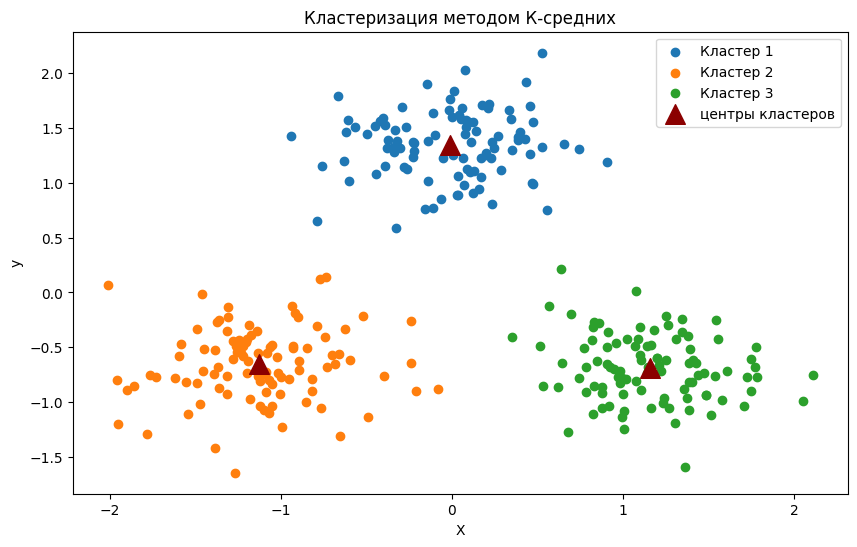

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for i in range(3):
  cluster_points = X_train_scaled[clusters == i]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {i + 1}')

cluster_centers = k_means.cluster_centers_
for i in range(3):
  plt.scatter(cluster_centers[i][0], cluster_centers[i][1], color="darkred", marker="^", s=200,
              label='центры кластеров' if i == 0 else "")

plt.xlabel('X')
plt.ylabel('y')
plt.title('Кластеризация методом К-средних')
plt.legend()
plt.show()

На представенном графике отображаются результаты кластеризации методом K-средних. Визуализация разделяет данные на три различные группы, каждая из которых обозначена своим цветом.

По графику можно сделать вывод, что метод К-средних довольно эффективно и без ошибок определяет класс, к которому относится наблюдение.

Далее, с использованием тестовых данных `test` выполняется предсказание. Строятся графики для тестовых данных. На графике центры кластеров помечаются треугольниками. Объекты из разных кластеров красятся разными цветами.

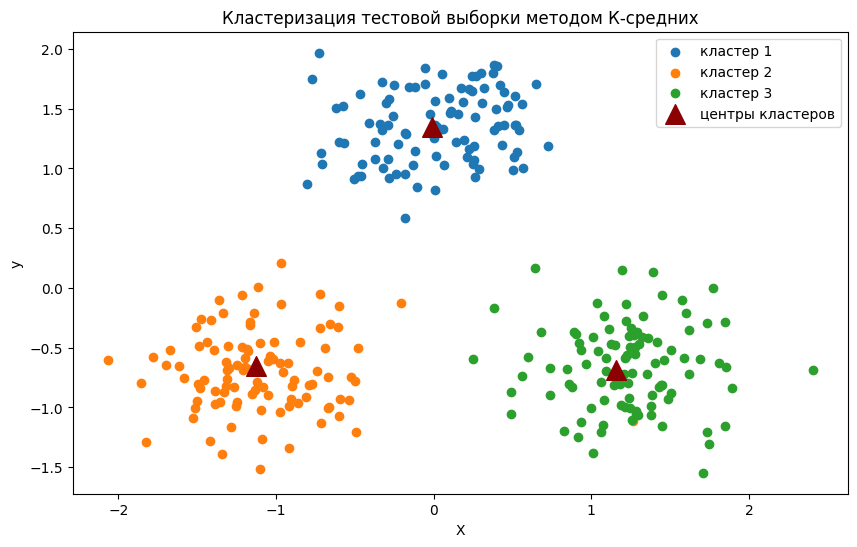

In [5]:
clusters_predict = k_means.predict(X_test_scaled)

plt.figure(figsize=(10,6))
for i in range(3):
  cluster_points = X_test_scaled[clusters == i]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'кластер {i + 1}')

cluster_centers = k_means.cluster_centers_
for i in range(3):
  plt.scatter(cluster_centers[i][0], cluster_centers[i][1], color="darkred", marker="^", s=200,
              label='центры кластеров' if i == 0 else "")

plt.xlabel('X')
plt.ylabel('y')
plt.title('Кластеризация тестовой выборки методом К-средних')
plt.legend()
plt.show()

Модель хорошо показывает себя на тестовой выборке. По графику видно, что определение классов для наблюдений прошло успешно.

Для достоверности подсчитывается коэффициент силуэта.

In [6]:
from sklearn.metrics import silhouette_score
s_score = silhouette_score(X_test_scaled, clusters_predict)
print(round(s_score, 2))

0.72


Коэффициент силуэта показывает, насколько хорошо была выполнена кластеризация, данный показатель находится в диапазоне от -1 до +1, при этом оценка около 0 указывает на перекрывающиеся кластеры.

Значение в 0,72 указывает на то, что обученная модель с высокой точностью определяет правильные классы.

Далее те же самые действия проделываются для n_clusters = 2 и n_clusters = 4. Сравниваются результаты и делаются выводы.

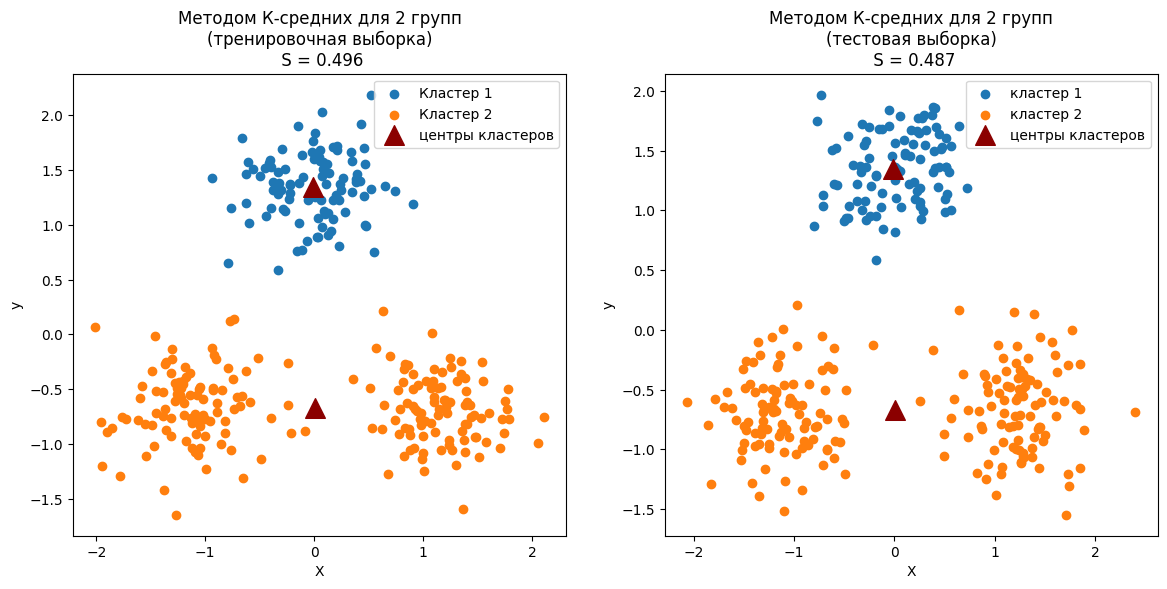

In [7]:
n = 2
k_means = KMeans(n_clusters = n, random_state = 1)
k_means_2 = k_means.fit(X_train_scaled)
clusters_predict_2 = k_means.predict(X_train_scaled)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)

for i in range(n):
  cluster_points = X_train_scaled[clusters_predict_2 == i]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {i + 1}')

cluster_centers_2 = k_means.cluster_centers_
for i in range(n):
  plt.scatter(cluster_centers_2[i][0], cluster_centers_2[i][1],
              color="darkred", marker="^", s=200,
              label='центры кластеров' if i == 0 else "")

s_score_2 = silhouette_score(X_train_scaled, clusters_predict_2)
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Методом К-средних для {n} групп\n(тренировочная выборка)\n S = {round(s_score_2, 3)}')
plt.legend()

clusters_predict_2 = k_means.predict(X_test_scaled)

plt.subplot(1, 2, 2)
for i in range(n):
  cluster_points = X_test_scaled[clusters_predict_2 == i]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'кластер {i + 1}')

cluster_centers_2 = k_means.cluster_centers_
for i in range(n):
  plt.scatter(cluster_centers_2[i][0], cluster_centers_2[i][1], color="darkred", marker="^", s=200,
              label='центры кластеров' if i == 0 else "")

s_score_3 = silhouette_score(X_test_scaled, clusters_predict_2)
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Методом К-средних для {n} групп\n(тестовая выборка)\n S = {round(s_score_3, 3)}')
plt.legend()
plt.show()

По графикам кластеризации на 2 группы можно сделать вывод, что в целом кластеризация выполняется верно - модель правильно определяет принадлежность к группам по К-средним, но по графику отчетливо видно, что кластеров в данных три.

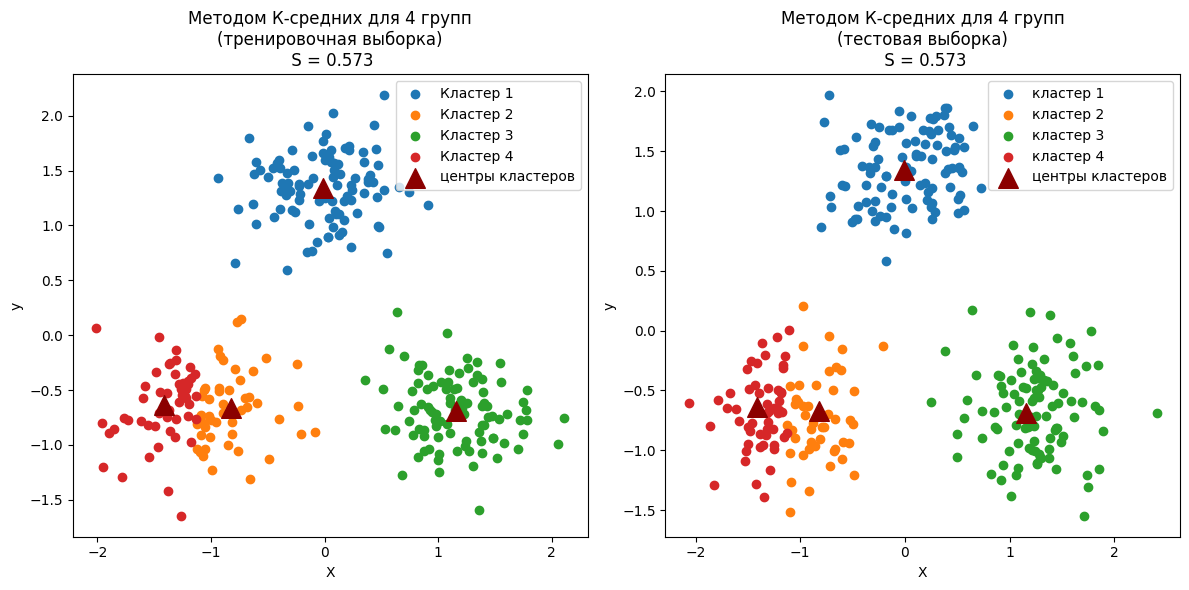

In [8]:
n = 4
k_means = KMeans(n_clusters = n, random_state = 1)
k_means_2 = k_means.fit(X_train_scaled)
clusters_predict_2 = k_means.predict(X_train_scaled)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i in range(n):
  cluster_points = X_train_scaled[clusters_predict_2 == i]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {i + 1}')

cluster_centers_2 = k_means.cluster_centers_
for i in range(n):
  plt.scatter(cluster_centers_2[i][0], cluster_centers_2[i][1],
              color="darkred", marker="^", s=200,
              label='центры кластеров' if i == 0 else "")
s_score_2 = silhouette_score(X_train_scaled, clusters_predict_2)
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Методом К-средних для {n} групп\n(тренировочная выборка)\n S = {round(s_score_2, 3)}')
plt.legend()

clusters_predict_2 = k_means.predict(X_test_scaled)

plt.subplot(1, 2, 2)
for i in range(n):
  cluster_points = X_test_scaled[clusters_predict_2 == i]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'кластер {i + 1}')

cluster_centers_2 = k_means.cluster_centers_
for i in range(n):
  plt.scatter(cluster_centers_2[i][0], cluster_centers_2[i][1], color="darkred", marker="^", s=200,
              label='центры кластеров' if i == 0 else "")

s_score_3 = silhouette_score(X_test_scaled, clusters_predict_2)
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Методом К-средних для {n} групп\n(тестовая выборка)\n S = {round(s_score_3, 3)}')
plt.legend()
plt.tight_layout()
plt.show()

По графикам кластеризации на 4 группы можно сделать вывод, что 1 и 3 группу модель определила верно и в целом, 2 и 3 группу тоже разделила логически верно, но на данном графике, также как и на прошлом, видно, что кластеров в данных три.

Далее строится график по “методу локтяˮ с помощью визуалайзера.

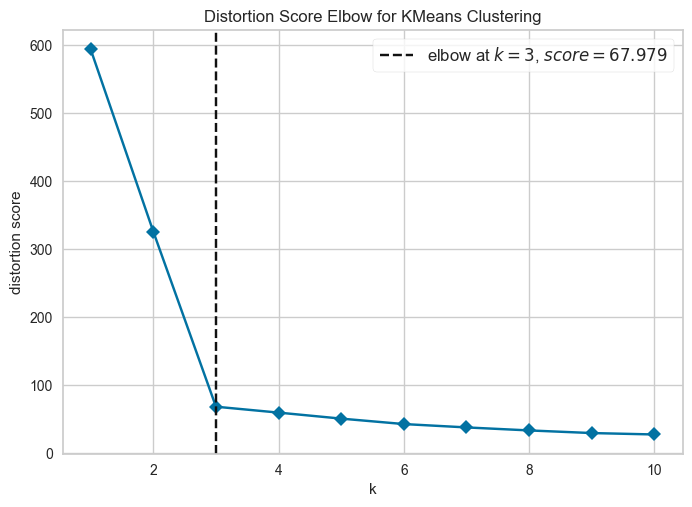

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(k_means, k=(1,11), timings=False)
visualizer.fit(X_train_scaled)
visualizer.show()

По графику четко видно и выделено, что количество кластеров равно 3, что подтверждается первой построенной диаграммой рассеяния.

### Часть 2 - Кластеризация по варианту

Производится загрузка CSV файла и вывод первых 5 строк.

In [10]:
import pandas as pd
liver = pd.read_csv('datasets/2liver.csv', sep=',')
liver.head()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1


Набор данных `2liver.csv`
Содержит информацию о заболеваемости печени:
1. Возраст пациента
2. Пол пациента
3. Общий билирубин
4. Прямой билирубин
5. Щелочная фосфатаза
6. Аламиноаминотрансфераза
7. Аспартатаминотрансфераза
8. Всего белков
9. Альбумин
10. Соотношение альбуминов и глобулинов
11. Целевое поле: два значения - пациент с заболеванием печени или без заболевания.

Проводится предварительная обработка данных.

Для начала выводится общая информация о датасете.

In [11]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   TotalBilirubin              585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset123                  587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


Значения столбца `Aspartate_Aminotransferase` приводятся к типу `float64`.

In [12]:
liver['Aspartate_Aminotransferase'] = pd.to_numeric(liver['Aspartate_Aminotransferase'], errors='coerce')
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   TotalBilirubin              585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  586 non-null    float64
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset123                  587 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 50.6+ KB


Датасет проверяется на наличие пропущенных значений.

In [13]:
liver.isna().sum()

Age                           0
Gender                        0
TotalBilirubin                2
Direct_Bilirubin              0
Alkaline_Phosphotase          1
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    1
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset123                    0
dtype: int64

Чтобы модель правильно классифицировала наблюдения, вместо заполнения пустых полей они просто удаляются, так как их очень мало.

In [14]:
liver = liver.dropna()
liver.isna().sum()

Age                           0
Gender                        0
TotalBilirubin                0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset123                    0
dtype: int64

Проверяется корректность заголовков столбцов.

In [15]:
liver.columns

Index(['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset123'],
      dtype='object')

Столбец `Dataset123` переименовывается в `Disease`.

In [16]:
liver = liver.rename(columns = {'Dataset123':'Disease'})
liver.columns

Index(['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Disease'],
      dtype='object')

Далее производится проверка на явные дубликаты.

In [17]:
liver.duplicated().sum()

15

Дубликаты удаляются, после чего обновляется нумерация индексов.

In [18]:
liver = liver.drop_duplicates()
liver = liver.reset_index(drop=True)
liver.duplicated().sum()

0

Далее производится проверка на наличие неявных дубликатов.

In [19]:
print(liver['Gender'].unique(),
      liver['Disease'].unique())

['Female' 'Male' 'Mal'] ['1' '2' 'yes']


Перед устранением неявных дубликатов необходимо определить какое из значений "1" и "2" означает, что человек болен, а какое - не болен. Для этого подсчитывается кол-во наблюдений с обоими признаками.

In [20]:
print("1 -", (liver['Disease'] == '1').sum())
print("2 -", (liver['Disease'] == '2').sum())
print("yes -", (liver['Disease'] == 'yes').sum())

1 - 402
2 - 161
yes - 1


Так как по статистике в наблюдениях реже встречается статус "болен" можно сделать вывод, что "1" означает, что человек не болен, а "2", что болен. Значение "yes" относится к значению "2".

Дубликаты заменяются на корректные значения, а значения "1" и "2" переименовываются в "yes" и "no".

In [21]:
liver['Gender'] = liver['Gender'].replace('Mal', 'Male')
liver['Disease'] = liver['Disease'].replace('1', 'no')
liver['Disease'] = liver['Disease'].replace('2', 'yes')

print(liver['Gender'].unique(),
      liver['Disease'].unique())

['Female' 'Male'] ['no' 'yes']


Для кластерного анализа данных необходимо привести строковые данные к числовым. Для этого используется `OrdinalEncoder`.

In [22]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
liver['Gender'] = encoder.fit_transform(liver[['Gender']])
liver['Disease'] = encoder.fit_transform(liver[['Disease']])
liver.head()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,0.0,0.7,0.1,187.0,16,18.0,6.8,3.3,0.90,0.0
1,62,1.0,10.9,5.5,699.0,64,100.0,7.5,3.2,0.74,0.0
2,62,1.0,7.3,4.1,490.0,60,68.0,7.0,3.3,0.89,0.0
3,58,1.0,1.0,0.4,182.0,14,20.0,6.8,3.4,1.00,0.0
4,72,1.0,3.9,2.0,195.0,27,59.0,7.3,2.4,0.40,0.0


В столбце `Gender` "0" означает "Female", а "1" - "Male". В столбце `Disease` "0" означает "no", а "1" - "yes".

Целевой переменной, которую необходимо предсказать, является столбец `Disease` (болен человек или нет). Целевая переменная не включается в модель.

Строится матрица диаграмм рассеяния. Значения целевой переменной выделяются разными цветами.

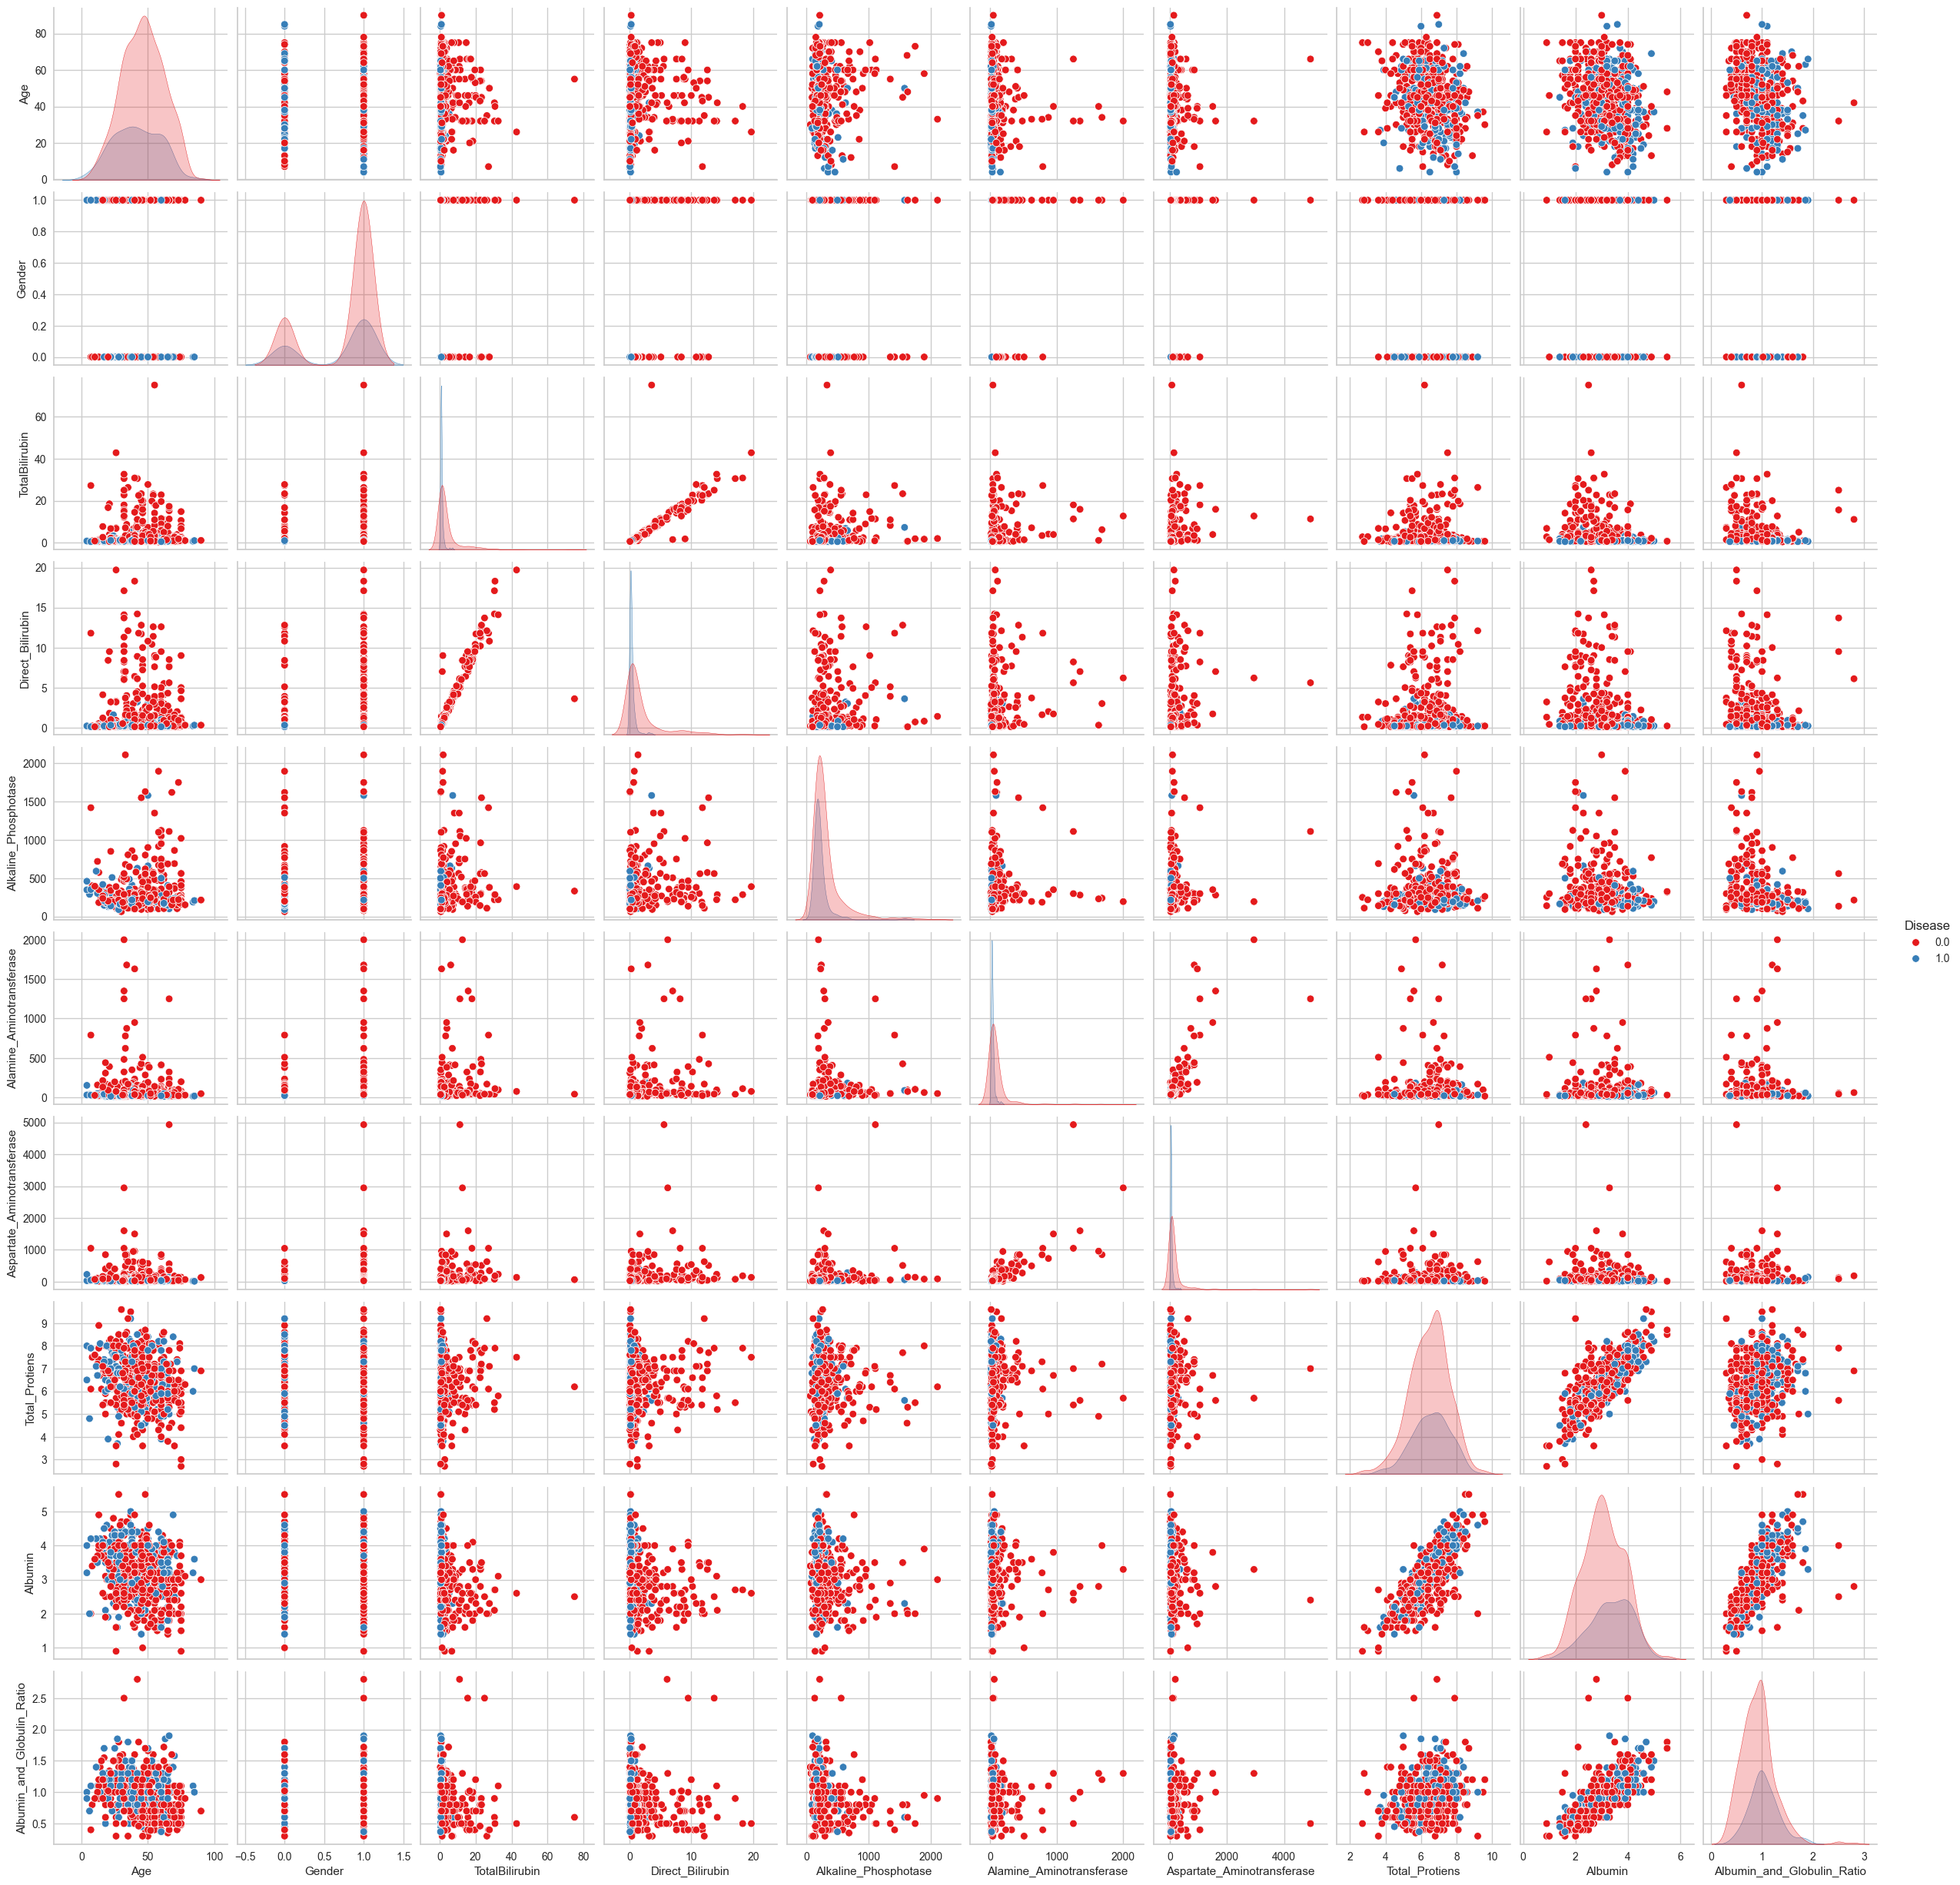

In [23]:
import seaborn as sns

sns.pairplot(liver[['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
                    'Alkaline_Phosphotase', 'Alamine_Aminotransferase',	'Aspartate_Aminotransferase',
                    'Total_Protiens',	'Albumin',	'Albumin_and_Globulin_Ratio', 'Disease']],
                    hue = 'Disease', palette = "Set1")

На представленной матрице зависимостей (матрица рассеяния) можно сделать следующие выводы:
- болезнь печени встречается у людей с низким показателем "TotalBilirubin", "Direct_Bilirubin", "Alamine Aminotransferase" и "Aspartate Aminotransferase";
- болезнь печени встречается во всех возрастах примерно одинаково, поэтому данный признак в обучение модели не включается;
- наличие болезни печени не зависит от пола, поэтому данный признак тоже не включается в обучение модели;
- наблюдается сильная положительная корреляция между "TotalBilirubin" и "DirectBilirubin";
- наблюдается умеренная положительная корреляция между "Total_Protiens" и "Albumin";
- наблюдается умеренная положительная корреляция между "Albumin" и "Albumin_and_Clobuline_Ratio".

Строится тепловая карта корреляции числовых признаков для определения коллинеарных признаков.

<Axes: >

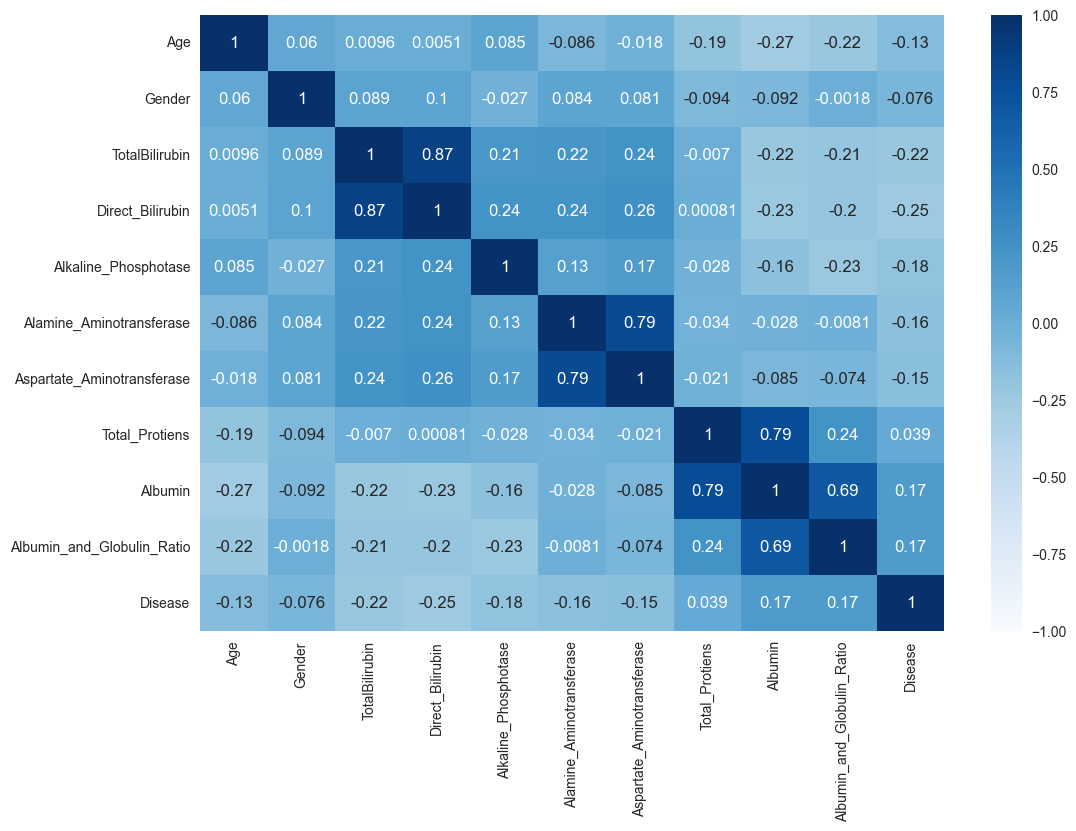

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(liver.corr(numeric_only = True),
            annot = True, vmin=-1, vmax=1, center= 0, cmap = 'Blues')

По тепловой карте видно:
- 'TotalBilirubin' и 'Direct_Bilirubin' являются по сути одним и тем же (показатели билирубина), поэтому между ними силная корреляция, что говорит о коллинеарности признаков, поэтому один из признаков убирается при обучении модели, в данном случае не учитывается 'Direct_Bilirubin';
- между 'Alamine_Aminotransferase' и 'Aspartate_Aminotransferase' наблюдается высокая корреляция, но данные признаки отвечают за разные показатели, поэтому оба применяются при обучении;
- 'Total_Proteins' и 'Albumin' имеют высокую корреляцию, что говорит об их коллинеарности;
- 'Albumin' и 'Albumin_and_Globulin_Ratio' также имеют значительную корреляцию, но они представляют разные данные по-разному (если основываться медицинских формулах): 'Albumin' — абсолютное значение альбумина.
'Albumin_and_Globulin_Ratio' — соотношение альбумина к глобулинам.

В итоге 'Total_Proteins' исключается при обучении модели, так как этот показатель полностью зависит от других признаков, а
'Albumin', 'Albumin_and_Globulin_Ratio' оставляются.

Далее данные делятся на тренировочные и тестовые.

In [25]:
from sklearn.model_selection import train_test_split

liver_columns = ['TotalBilirubin', 'Alkaline_Phosphotase',
             'Alamine_Aminotransferase',	'Aspartate_Aminotransferase',
             'Albumin',	'Albumin_and_Globulin_Ratio']

target = liver['Disease']
liver = pd.DataFrame(liver, columns = liver_columns)


X_train, X_test, y_train, y_test = train_test_split(liver, target, test_size=0.2, random_state=1)

print("X_train:")
display(X_train.head(3))
print("X_test:")
display(X_test.head(3))

X_train:


,TotalBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
324,0.8,198.0,36,32.0,4.0,1.3
382,0.7,162.0,24,20.0,3.2,1.0
400,4.2,450.0,69,50.0,3.0,0.7


X_test:


,TotalBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
47,0.7,170.0,21,14.0,2.5,0.7
246,0.8,185.0,25,21.0,3.0,0.7
509,3.5,298.0,68,200.0,3.4,0.9


Выполняется стандартизация числовых данных с помощью `StandardScaler`.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler_liver = StandardScaler()

X_train_scaled = scaler_liver.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = liver_columns)

X_test_scaled = scaler_liver.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = liver_columns)

X_train_scaled.describe().round(2)

,TotalBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
count,451.00,451.00,451.00,451.00,451.00,451.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.46,-0.96,-0.37,-0.33,-2.77,-2.00
25%,-0.40,-0.48,-0.31,-0.28,-0.78,-0.76
50%,-0.37,-0.35,-0.24,-0.23,-0.03,-0.14
75%,-0.11,0.02,-0.10,-0.08,0.84,0.49
max,10.88,7.55,10.04,15.28,2.95,5.77


Стандартизация была проведена успешно, все средние равны нулю, а стандартных отклонения равны 1.

Для определения кол-ва кластеров используется "метод локтя".

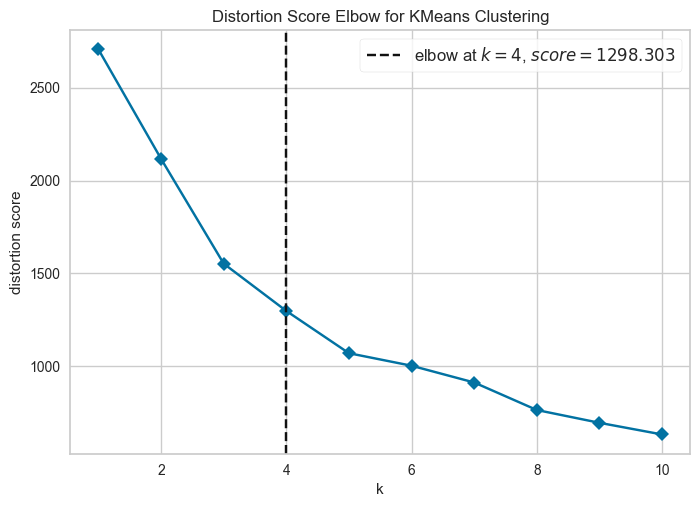

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(k_means, k=(1,11), timings=False)
visualizer.fit(X_train_scaled)
visualizer.show()

По "методу локтя" не получилось однозначно определить число кластеров, но видно, что distortion score (внутрикластерная дисперсия) быстро снижается при увеличении числа кластеров от 1 до 4, а дальнейшее увеличение не приводит к значительному улучшению, поэтому число кластеров равно 4.

Выполняется кластеризация объектов методом k-means. Подбирается количество кластеров равное 4.

In [28]:
liver_k_means = KMeans(n_clusters = 4, init = 'k-means++',
                       n_init=10, max_iter = 1000, random_state = 1)
target_pred = liver_k_means.fit_predict(X_train_scaled)

Определяются объекты, относящиеся к одному кластеру и делаются выводы о каждом кластере.

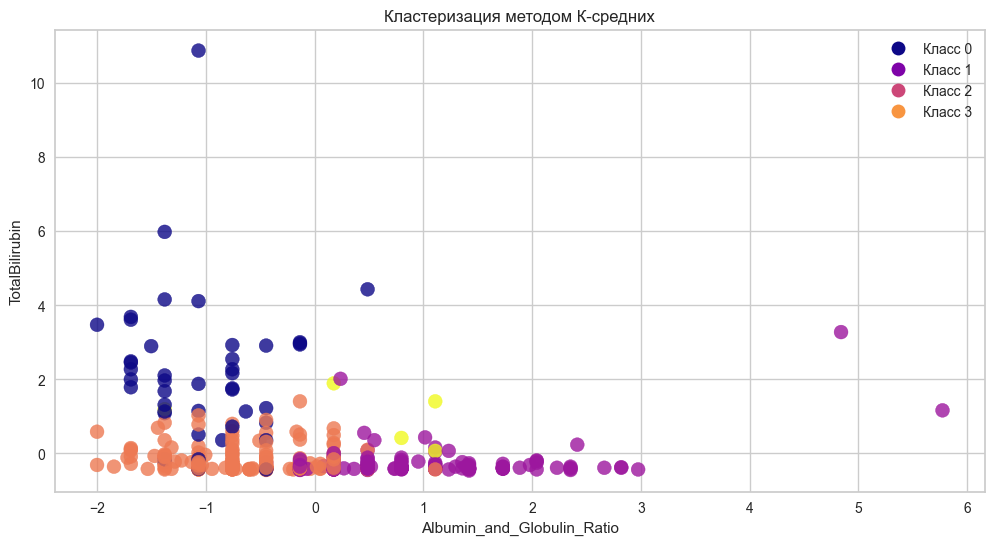

In [29]:
from matplotlib.lines import Line2D

plt.figure(figsize = (12,6))

scatter = plt.scatter(X_train_scaled['Albumin_and_Globulin_Ratio'],
                       X_train_scaled['TotalBilirubin'],
                       c=target_pred,
                       cmap='plasma', alpha=0.8, s=100)

handles = [Line2D([0], [0], marker='o', color='w',
                  markerfacecolor=scatter.cmap(i/4),
                  markersize=10,
                  label=f'Класс {i}') for i in range(4)]

plt.legend(handles=handles, loc='upper right')
plt.xlabel('Albumin_and_Globulin_Ratio')
plt.ylabel('TotalBilirubin')
plt.title('Кластеризация методом К-средних')
plt.show()

По графику, построенному по признакам 'Albumin_and_Globulin_Ratio' и 'TotalBilirubin', можно сделать следующие вывод, что модель K-средних довольно хорошо разделила наблюдения на 4 класса. Хоть и нельзя судить о всей кластеризации основываясь на графике только двух признаков из 6, все равно можно сказать, что разделение на классы хорошо прослеживается.

На графике также видны точки, которые значительно удалены от остальных данных. Эти выбросы могут указывать на уникальные наблюдения, которые выходят за рамки нормального распределения для большинства классов.

Далее, для объективной оценки работы модели подсчитываются средние показатели по каждому признаку каждого кластера. Для этого сначала создается новый датафрейм на основе тренировочных данных, затем к нему присоединяется целевая переменная.

In [30]:
summary = X_train
summary.columns = liver_columns
summary['target'] = target_pred
summary.head()

,TotalBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,target
324,0.8,198.0,36,32.0,4.0,1.30,1
382,0.7,162.0,24,20.0,3.2,1.00,1
400,4.2,450.0,69,50.0,3.0,0.70,2
477,0.7,165.0,31,29.0,3.0,0.96,2
19,2.2,610.0,17,28.0,2.6,0.55,2


Далее производится группировка по целевому признаку и подсчет средних значений каждого признака. Для удобства датафрейм транспонируется.

In [31]:
mean_summary = summary.groupby('target').mean().round(2)
mean_summary.T

target,0,1,2,3
TotalBilirubin,17.02,1.48,2.13,8.52
Alkaline_Phosphotase,669.54,224.71,272.32,400.67
Alamine_Aminotransferase,109.02,50.00,64.27,1476.67
Aspartate_Aminotransferase,178.78,58.60,90.04,2130.83
Albumin,2.49,3.84,2.59,3.18
Albumin_and_Globulin_Ratio,0.62,1.20,0.77,1.10


На основе представленных средних значений для разных признаков можно сделать следующие выводы:

- класс 0 имеет высокие значения TotalBilirubin, Alkaline_Phosphotase, ALT и AST, что скорее всего говорит о том, что в данную группу попали люди с заболеванием печени;
- у 1 и 2 классов в среднем очень похожие значения признаков, что говорит о том, что возможно данные классы могли быть объединены в один;
- в классе 3 наблюдаются очень высокие уровни Alamine_Aminotransferase и Aspartate_Aminotransferase, что также вероятно говорит о наличии болезни.

Далее считается коэффициент силуэта.

In [32]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_scaled, target_pred).round(3)

0.319

Значение 0.319 указывает на то, что кластеризация выполняется на низком уровне. Значения выше 0 демонстрируют, что объекты внутри кластеров находятся ближе друг к другу, чем к объектам в других кластерах.

Далее подсчитывается метрика ARI.

In [33]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(y_train, target_pred)
round(ari_score, 4)

-0.0049

ARI принимает значение -0,0049, что указывает на то, что кластеризация была проведена не лучшим образом. Это может означать, что объекты неправильно сгруппированы, или группы сильно пересекаются.


Далее подсчитаем коэффициент однородности.

In [34]:
from sklearn.metrics import homogeneity_score
homogeneity = homogeneity_score(y_train, target_pred)
round(homogeneity, 2)

0.07

Значение 0.07 указывает на то, что объекты в кластерах скорее всего принадлежат не к одному классу, они не однородны.

Далее выполняется кластеризация иерархическим агломеративным методом. Для определения кол-ва кластеров строится дендрограмма.

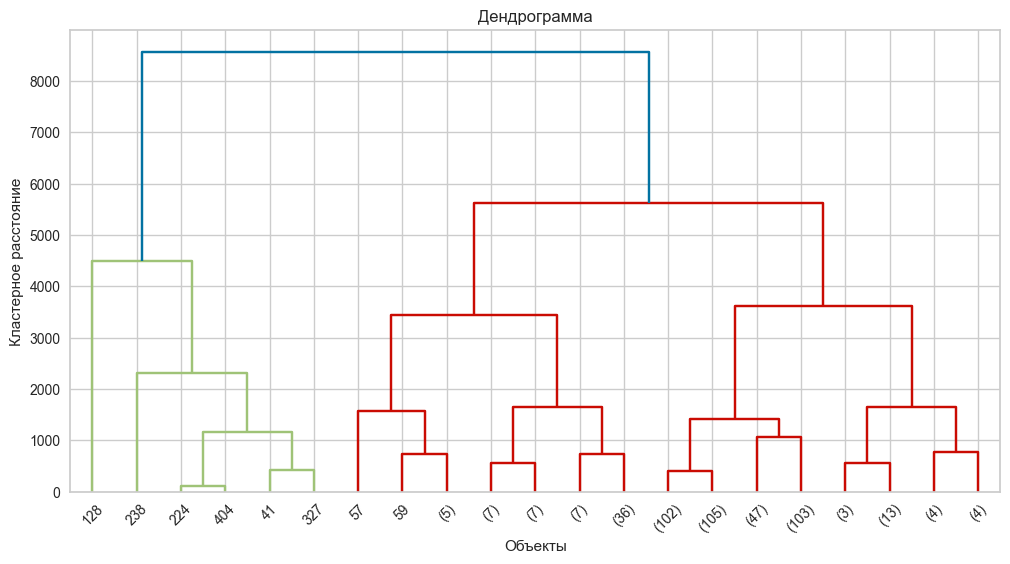

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(X_train, method='ward')

plt.figure(figsize = (12, 6))
dendrogram(linked, p = 4, truncate_mode='level')
plt.title('Дендрограмма')
plt.xlabel('Объекты')
plt.ylabel('Кластерное расстояние')
plt.show()

Дендрограмма показывает, как наблюдения объединялись в кластеры. На ее основе делается вывод, что наблюдения относятся к 2 кластерам, так как на этом уровне произошел резкий скачек дендрограммы.

Далее выполняется кластеризация иерархическим агломеративным методом. Подсчитываются средние показатели по каждому признаку каждого кластера и вычисляются несколько метрик качества.

In [36]:
agg_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_pred = agg_model.fit_predict(X_train_scaled)

s_score = silhouette_score(X_train, agg_pred)
ARI_agg = adjusted_rand_score(y_train, agg_pred)
homogeneity_agg = homogeneity_score(y_train, agg_pred)

print(f'Коэфф. силуэта: {round(s_score, 3)} \nARI: {round(ARI_agg, 3)}\nОднородность: {round(homogeneity, 3)}')

summary['target'] = agg_pred
mean_summary = summary.groupby('target').mean().round(2)
mean_summary.T

Коэфф. силуэта: 0.887 
ARI: -0.015
Однородность: 0.068


target,0,1
TotalBilirubin,3.38,8.52
Alkaline_Phosphotase,292.62,400.67
Alamine_Aminotransferase,62.67,1476.67
Aspartate_Aminotransferase,85.51,2130.83
Albumin,3.13,3.18
Albumin_and_Globulin_Ratio,0.94,1.10


На основе сравнительной таблицы делаются выводы:
- класс 0 имеет низкий уровень почти всех показателей, кроме 'Albumin_and_Globulin_Ratio', что скорее всего указывает на то, что в эту группу попали здоровые люди;
- класс 1 имеет наоборот высокие показатели, что может говорить о болезни.
Вывод по метрикам качества:
- коэффициент силуэта (0.887) - это высокий показатель, что говорит о хорошем разделении кластеров. Объекты внутри кластеров довольно похожи;
- ARI (-0.015) близкое к нулю указывает на то, что результат кластеризации не совпадает с истинными метками классов;
- очень низкая однородность означает, что внутри кластеров данные очень разнообразны и не похожи друг на друга.

Модель кластеризации в целом разделяет данные на два кластера с явными различиями по значениям признаков, но низкая однородность и низкий ARI показывают, что кластеры могут быть не полностью различимы моделью.

## Вывод


В ходе выполнения лабораторной работы были изучены методы и алгоритмы кластеризации данных на практике, с целью выявления закономерностей.

В первой части работы была выполнена кластеризация на основе сгенерированного набора данных. Была выполнена стандартизация данных, обучение модели методом К-средних и предсказание для двух, трех и четырех кластеров. По результатам анализов, метрик и при помощи «метода локтя»  было выявлено, что данные лучше всего делятся на 3 кластера.

Во второй части работы была произведена работа по кластеризации датасета с информацией о пациентах и статусе их заболевания (болезни печени).

Первым шагом была выполнена предварительная обработка данных, затем проанализированы зависимости между признаками, выявлены "шумы" и коллинеарные признаки, которые не учитывались при дальнейшем обучении модели. Признаки были разделены на обучающую и тестовую выборки, после чего стандартизированы.

Далее было определено кол-во кластеров методом К-средних, обучение модели и предсказание. В среднем метрики качества модели показали довольно низкие значения, что могло объясняться некорректностью данных, либо тем, что признаки плохо описывают целевой признак.

Далее для этого же датасета количество кластеров определялось с помощью построения дендрограммы. Проводилась кластеризация иерархическим агломеративным методом.

По результатам работы, лучшие показатели продемонстрировала модель кластеризации иерархическим агломеративным методом для 2 кластеров, нежели чем модель обученная методом К-средних для 4 кластеров.

По показателям метрик качества и сравнительным таблицам со средними значениями всех признаков каждого кластера  было выявлено, что данные скорее всего содержат именно 2 кластера. Но ни одна модель с высокой точностью не определила правильный целевой признак.

## Выполнение дополнительного задания


Выполнить подсчёт 4 любых метрик для разного количества кластеров (от 2 до 10). Построить график - по оси х - кол-во кластеров, по у - значение метрики (отразить все 4 метрики на одном графике разным цветом).

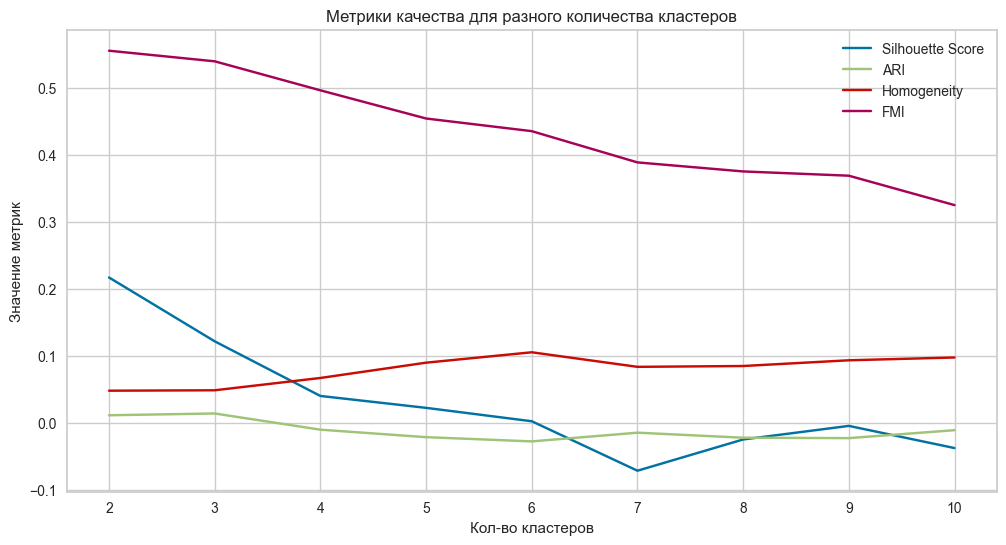

In [37]:
from sklearn.metrics import fowlkes_mallows_score

s_score_list = []
ari_list = []
homogeneity_list = []
fmi_list = []

for i in range(2, 11):
  i_k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
  target_pred_i = i_k_means.fit_predict(X_train_scaled)

  s_score_list.append(silhouette_score(X_train, target_pred_i))
  ari_list.append(adjusted_rand_score(y_train, target_pred_i))
  homogeneity_list.append(homogeneity_score(y_train, target_pred_i))
  fmi_list.append(fowlkes_mallows_score(y_train, target_pred_i))

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), s_score_list, label='Silhouette Score')
plt.plot(range(2, 11), ari_list, label='ARI')
plt.plot(range(2, 11), homogeneity_list, label='Homogeneity')
plt.plot(range(2, 11), fmi_list, label='FMI')
plt.title('Метрики качества для разного количества кластеров')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Значение метрик')
plt.legend()
plt.grid(True)
plt.show()

На основе анализа метрик качества модели К-средних, оптимальное количество кластеров для данной набора данных составляет 2, так как при 2 кластерах наблюдается самый высокий коэффициент силуэта и FMI, что говорит о самых сильных различиях в наблюдений одного кластера от наблюдений другого и о самой высокой доле правильно кластеризованных наблюдений именно при разделении наблюдений на 2 кластера.
